# ECS32A Plotting in Python with Matplotlib
This notebook is provided to students as a supplementary example of what can be done with Python.
It demonstrates creating plots using Python and the <a href="https://matplotlib.org">matplotlib</a> Python module.
The module does not come with Python but is installed on our Jupyter hub. If you cannot install matplotlib on your own computer, it should be possible to use our Jupyter hub to run your own programs.

## Example 1: Plotting Time Series Data 

We analyzed time series data in homework 5. Students interested in a challenge can modify their temperature anomaly program to plot the data. 

## Plot Years and Temps

Random walks in various forms are used to simulate many real world processes. Here we use it to demonstrate plotting a generic time series using Python and matplotlib. The x-axis of the plot will be time and the y-axis will be value. A real world analogy might be the price of a stock or a temperature over time.  

Below is the Python code for plotting years and temps using matplotlib. 


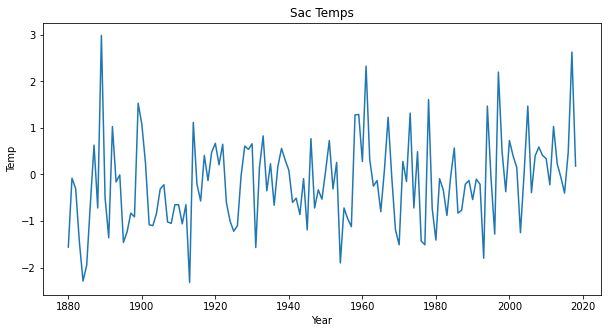

In [16]:
import random
import matplotlib.pyplot as plt

# x_values contains a list of years to plot
x_values = [  ]
# The y axis is the temp value
y_values = [  ]

# open sac temp file
infile = open("SacramentoTemps.csv","r")
infile.readline() # ignore the first line of the file

# use a for loop to read the lines from the file
for line in infile:
    line=line.strip()
    # split each line 
    year,temp = line.split(",")
    # print(year,float(temp))
    # append year and temp
    x_values.append(int(year))
    y_values.append(float(temp))

infile.close()
plt.figure(figsize=(10,5)) # Set figure size width, height
plt.plot(x_values,y_values) # Load data into plot
plt.title("Sac Temps") # Label plot
plt.xlabel("Year") # Label x axis
plt.ylabel("Temp") # Label y axis
plt.show() # Draw plot

## Example 2:  Bubble Plots

A bubble plot places points on two axes to show the relationship between two attributes. Additionally, bubble plots include a third dimension represented by the size of the point. In this example we use matplotlib to load a file of data and create a bubble plot.

To demonstrate the bubble plot we will investigate the relationship between per capita wealth and self reported happiness by country  using publically available datasets. The comma delimited datafile we are loading has four columns: 

1. Country, the name of the country. This column will be used as labels.

2. Population in Millions, from the CIA world factbook. This column  determines the size of the bubble.

3. GDP per Capita, the average GDP per person from the CIA world factbook. This column will be the x axis.

4. Happiness, is the self reported hapiness from the World Happiness Report. This column will be the y axis.

This code assumes that a file called world_pop_gdp_happy.csv is on the server. If running this in your own directory, you should also upload the file. A few lines from the file are shown here:

```text
Country,Population in Millions,GDP per Capita,Happiness
China,1394.02,18192.04,5.131433964
United States,332.64,58592.03,6.882684708
India,1326.09,7144.29,3.818068743
Japan,125.51,43367.94,5.793575287
```

The program below is large enough to be divided into a main function with two function calls. 

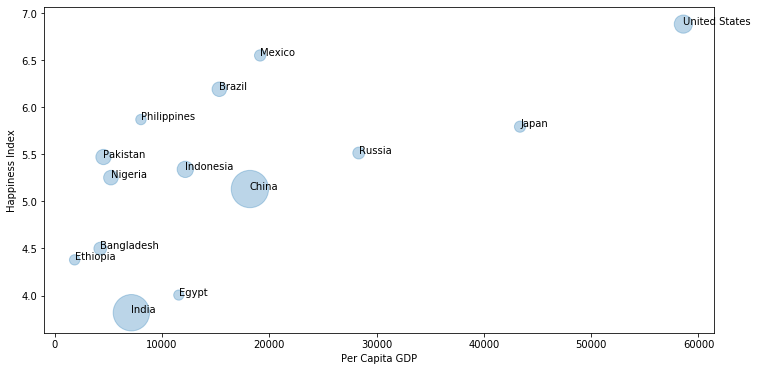

In [ ]:
import matplotlib.pyplot as plt

# Function reads the happiness file 
def read_data_file():
    fname = "world_pop_gdp_happy.csv"
    infile = open(fname)

    pop_list = []
    happy_list = []
    gdp_list = []
    country_list = []

    infile.readline() # ignore column header
    
    # loop over the lines of the input file and 
    # extract the data into four lists
    for line in infile:
        line = line.strip()
        
        # The columns are Country\tGDP per Capita\tPopulation in Millions\tHappiness
        cols = line.split(",")
        
        country = cols[0]
        country_list.append(country)
        
        pop = float(cols[1])
        pop_list.append(pop)
        
        pc_gdp = float(cols[2])
        gdp_list.append(pc_gdp)
        
        happy = float(cols[3])
        happy_list.append(happy)
    
    return country_list,gdp_list,pop_list,happy_list
    
# Function creates a bubble plot of the data in the happiness file     
def plot_data(country_list,gdp_list,pop_list,happy_list):
    # New scatter plot
    # This sets the plot size
    plt.figure(figsize=(12,6))
    
    # The size of the points will bet determined by population
    plt.scatter(gdp_list,happy_list,s=pop_list,alpha=0.3)

    # Set labels
    plt.xlabel("Per Capita GDP")  # Label x axis
    plt.ylabel("Happiness Index") # Label y axis

    # This optional code adds labels
    # loop over the country names and add them to the plot
    # at the same coordinates as the bubble if the country
    # is larger than a minimum population
    if country_list != None:
        for i in range(len(country_list)):
            label = country_list[i]    # label point by country
            x = gdp_list[i]            # x-axis location of label
            y = happy_list[i]          # y-axis location of label
            plt.annotate(label, (x, y))# set label
    
    # This shows the plot
    plt.show()

# Main program
def main():
    # read the happiness file 
    country_list,gdp_list,pop_list,happy_list = read_data_file()
    # plot the happiness data
    plot_data(country_list,gdp_list,pop_list,happy_list)

main()